In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [279]:
base_metadata_pth = Path('/Users/tsakalis/ntua/nestor/nestor_celvia/metadata')

basic_metadata_file = 'metadata.repository.2024-11-05.json'
clinical_cohort_file = 'clinical.cohort.2024-11-07.json'
biospecimen_file = 'biospecimen.cohort.2024-11-07.json'
gene_expr_file = 'Human__TCGA_OV__UNC__RNAseq__GA_RNA__01_28_2016__BI__Gene__Firehose_RSEM_log2.cct'
gene_expr_file = "Human__TCGA_OV__UNC__RNAseq__HiSeq_RNA__01_28_2016__BI__Gene__Firehose_RSEM_log2.cct"

gene_mutation_file = 'Human__TCGA_OV__WUSM__Mutation__GAIIx__01_28_2016__BI__Gene__Firehose_MutSig2CV.cbt'

In [280]:
gene_names = pd.read_csv(base_metadata_pth / 'GeneNames.tsv', header=None)

In [293]:
metadata_df = pd.read_json(base_metadata_pth / basic_metadata_file)

clinical_cohort_df = pd.read_json(base_metadata_pth / clinical_cohort_file)

biospecimen_df = pd.read_json(base_metadata_pth / biospecimen_file)
gene_expr_df = pd.read_csv(base_metadata_pth / gene_expr_file, delimiter='\t')

gene_mutation_df = pd.read_csv(base_metadata_pth / gene_mutation_file,
                               delimiter='\t')

In [294]:
metadata_df.head(1)

,data_format,access,associated_entities,file_name,submitter_id,data_category,annotations,file_size,md5sum,file_id,data_type,state,experimental_strategy
0,SVS,open,[{'entity_submitter_id': 'TCGA-61-1903-01A-01-...,TCGA-61-1903-01A-01-BS1.77116a06-9e30-4bf6-885...,TCGA-61-1903-01A-01-BS1_slide_image,Biospecimen,"[{'entity_submitter_id': 'TCGA-61-1903', 'note...",200210513,05da084e2d65c34aa87bf865483f8b6d,13c2fa97-02ed-4442-aad8-9c4e6b365adc,Slide Image,released,Tissue Slide


In [295]:
latent_vec_pth = Path(
    '/Users/tsakalis/ntua/nestor/nestor_celvia/src/vae_embeddings/latent_vectors'
)

In [296]:
latent_vecs = [(pth.stem, np.load(pth))
               for pth in latent_vec_pth.glob('*.npy')]

# latent_vecs = [np.load(pth) for pth in latent_vec_pth.glob('*.npy')]

In [297]:
gene_names[0].apply(lambda x: x.lower())

0        tp53
1         kit
2        egfr
3      pik3ca
4        braf
        ...  
113     myd88
114    notch2
115     ntrk3
116     ptch1
117      top1
Name: 0, Length: 118, dtype: object

In [318]:
gene_expr_df.set_index('attrib_name')

,TCGA.04.1348,TCGA.04.1357,TCGA.04.1362,TCGA.04.1364,TCGA.04.1365,TCGA.04.1514,TCGA.04.1519,TCGA.09.0364,TCGA.09.0366,TCGA.09.0367,...,TCGA.61.2102,TCGA.61.2104,TCGA.61.2109,TCGA.61.2110,TCGA.61.2111,TCGA.61.2113,TCGA.OY.A56P,TCGA.OY.A56Q,TCGA.VG.A8LO,TCGA.WR.A838
attrib_name,,,,,,,,,,,,,,,,,,,,,
A1BG,6.0762,6.0567,5.4142,7.5549,4.6398,5.0795,5.5650,7.3563,6.4847,7.5979,...,6.0157,6.6460,5.2990,7.1433,6.5806,6.1586,5.4651,5.1163,4.8560,4.1051
A1CF,0.0000,0.0000,0.4125,0.0000,0.0000,0.0000,0.0000,0.9286,0.0000,0.0000,...,0.0000,0.0000,0.0000,1.5389,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
A2BP1,0.3436,0.7233,2.4067,3.5361,2.8735,1.5922,8.6558,0.9286,0.2956,4.4712,...,0.0000,3.0791,8.3642,10.1380,0.0000,0.7646,0.8492,8.4103,0.9755,0.4694
A2LD1,7.7978,7.1526,8.0597,6.5736,5.0282,5.5677,5.9073,7.1711,6.0259,6.9708,...,5.8355,7.3919,7.5965,5.7131,5.3346,5.7545,5.0706,6.4495,7.3238,6.5426
A2ML1,3.0924,5.7993,2.7282,2.6060,2.1093,2.2455,2.8541,8.1254,2.5301,9.3545,...,1.4851,2.4886,0.5625,4.1820,4.0541,1.7850,6.6340,8.0799,2.4618,7.8172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX,13.9542,12.3934,12.5836,12.5443,12.8164,12.5187,13.9936,12.2342,13.5514,12.4470,...,14.1573,12.8663,13.1732,13.8964,12.1618,12.7289,13.3103,13.4212,12.9882,12.6438
ZZEF1,8.9852,9.6552,9.8178,8.5458,9.0087,9.7914,8.9821,9.9284,9.7433,9.3995,...,8.8839,10.1035,9.4551,9.3334,9.1599,10.4343,10.5705,9.0466,9.7060,10.9368
ZZZ3,8.8976,8.7017,9.6527,8.8003,9.6222,10.1676,10.3867,9.2320,9.4618,9.0150,...,9.9952,10.6165,10.0977,10.1854,10.6791,9.9265,11.4652,11.2688,10.3425,10.4988


In [319]:
merged_genes = pd.merge(gene_expr_df.set_index('attrib_name'),
                        gene_names[0].apply(lambda x: x),
                        left_index=True,
                        right_on=0)

merged_genes = merged_genes.set_index(0).T

In [321]:
merged_genes

,AKT1,AKT2,AKT3,ALK,ARAF,ARID1A,AR,ATM,ATRX,ATR,...,SPOP,SRC,STAT3,STK11,TOP1,TP53,TSC1,TSC2,U2AF1,XPO1
TCGA.04.1348,12.5446,12.5256,6.9018,6.1091,10.6704,12.2302,6.8252,8.5195,10.5208,9.4104,...,10.1504,9.1479,11.9670,10.7250,11.2246,12.2851,8.8353,11.6781,11.3683,12.1392
TCGA.04.1357,12.4337,11.5986,7.0711,5.9738,11.1056,10.4242,7.8384,9.6795,10.8744,8.9668,...,10.4056,9.7897,12.8895,10.9486,11.1455,9.5909,9.0292,12.0694,10.6584,12.1957
TCGA.04.1362,11.7124,11.8640,5.0198,6.9007,10.9603,12.0052,7.1361,9.4491,11.1086,9.8601,...,10.6425,11.0256,12.8345,10.5411,10.7250,8.8845,10.3351,11.2904,10.5580,12.3966
TCGA.04.1364,11.8507,11.0129,4.9786,3.7783,11.0797,11.8265,5.9156,9.2694,10.2472,8.7879,...,10.0180,11.3400,11.7577,8.8738,12.3631,11.7589,9.1355,11.2187,10.6640,12.0109
TCGA.04.1365,12.8338,11.1376,5.4525,5.4624,10.8861,12.4871,6.0398,8.2629,10.6755,9.1546,...,10.7244,10.5127,12.0994,10.0001,11.7241,11.7777,9.5075,11.6229,10.1877,12.3303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.61.2113,12.0080,11.9356,7.6426,4.4341,12.1275,12.7103,5.2227,9.4262,9.7136,9.3277,...,10.1581,11.0098,12.6257,9.7184,11.4829,11.7458,9.9613,11.1643,10.6754,12.4288
TCGA.OY.A56P,10.6654,11.1659,5.7593,5.9522,10.3949,13.6756,10.0161,11.8110,11.5511,10.5846,...,9.9412,10.8234,12.5128,8.8892,11.3997,11.9811,9.8355,12.4506,10.6330,13.2112
TCGA.OY.A56Q,11.7956,12.2017,5.6337,2.6626,9.3416,13.2268,8.4507,9.8492,10.7277,10.0065,...,9.8298,10.4756,11.6663,9.6889,11.4853,8.9084,10.0023,13.2219,10.8520,13.7147
TCGA.VG.A8LO,11.1990,12.2354,5.1742,3.7953,10.1841,12.3887,6.6560,10.9230,11.2361,10.5191,...,8.8464,10.9394,11.6797,10.1209,11.3794,11.3764,10.4698,11.5971,10.7441,12.8646


In [322]:
clinical_cohort_df['submitter_id'] = clinical_cohort_df['submitter_id'].apply(
    lambda x: x.replace('-', '.'))

In [323]:
merged_genes

,AKT1,AKT2,AKT3,ALK,ARAF,ARID1A,AR,ATM,ATRX,ATR,...,SPOP,SRC,STAT3,STK11,TOP1,TP53,TSC1,TSC2,U2AF1,XPO1
TCGA.04.1348,12.5446,12.5256,6.9018,6.1091,10.6704,12.2302,6.8252,8.5195,10.5208,9.4104,...,10.1504,9.1479,11.9670,10.7250,11.2246,12.2851,8.8353,11.6781,11.3683,12.1392
TCGA.04.1357,12.4337,11.5986,7.0711,5.9738,11.1056,10.4242,7.8384,9.6795,10.8744,8.9668,...,10.4056,9.7897,12.8895,10.9486,11.1455,9.5909,9.0292,12.0694,10.6584,12.1957
TCGA.04.1362,11.7124,11.8640,5.0198,6.9007,10.9603,12.0052,7.1361,9.4491,11.1086,9.8601,...,10.6425,11.0256,12.8345,10.5411,10.7250,8.8845,10.3351,11.2904,10.5580,12.3966
TCGA.04.1364,11.8507,11.0129,4.9786,3.7783,11.0797,11.8265,5.9156,9.2694,10.2472,8.7879,...,10.0180,11.3400,11.7577,8.8738,12.3631,11.7589,9.1355,11.2187,10.6640,12.0109
TCGA.04.1365,12.8338,11.1376,5.4525,5.4624,10.8861,12.4871,6.0398,8.2629,10.6755,9.1546,...,10.7244,10.5127,12.0994,10.0001,11.7241,11.7777,9.5075,11.6229,10.1877,12.3303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.61.2113,12.0080,11.9356,7.6426,4.4341,12.1275,12.7103,5.2227,9.4262,9.7136,9.3277,...,10.1581,11.0098,12.6257,9.7184,11.4829,11.7458,9.9613,11.1643,10.6754,12.4288
TCGA.OY.A56P,10.6654,11.1659,5.7593,5.9522,10.3949,13.6756,10.0161,11.8110,11.5511,10.5846,...,9.9412,10.8234,12.5128,8.8892,11.3997,11.9811,9.8355,12.4506,10.6330,13.2112
TCGA.OY.A56Q,11.7956,12.2017,5.6337,2.6626,9.3416,13.2268,8.4507,9.8492,10.7277,10.0065,...,9.8298,10.4756,11.6663,9.6889,11.4853,8.9084,10.0023,13.2219,10.8520,13.7147
TCGA.VG.A8LO,11.1990,12.2354,5.1742,3.7953,10.1841,12.3887,6.6560,10.9230,11.2361,10.5191,...,8.8464,10.9394,11.6797,10.1209,11.3794,11.3764,10.4698,11.5971,10.7441,12.8646


In [324]:
gene_patient = pd.merge(clinical_cohort_df,
                        merged_genes,
                        left_on='submitter_id',
                        right_index=True)

In [325]:
gene_patient.head(1)

,case_id,project,submitter_id,diagnoses,demographic,exposures,family_histories,follow_ups,AKT1,AKT2,...,SPOP,SRC,STAT3,STK11,TOP1,TP53,TSC1,TSC2,U2AF1,XPO1
3,005a6517-2e5a-4ea3-ab36-531522723607,{'project_id': 'TCGA-OV'},TCGA.61.1740,"[{'figo_stage': 'Stage IIIC', 'synchronous_mal...","{'ethnicity': 'not hispanic or latino', 'gende...","[{'alcohol_history': 'Not Reported', 'updated_...",NaN,NaN,12.7175,12.1785,...,10.1614,9.4752,12.6588,9.6971,10.9084,13.0938,9.7203,12.004,9.8865,12.1472


In [326]:
metadata_df.head(1)

,data_format,access,associated_entities,file_name,submitter_id,data_category,annotations,file_size,md5sum,file_id,data_type,state,experimental_strategy
0,SVS,open,[{'entity_submitter_id': 'TCGA-61-1903-01A-01-...,TCGA-61-1903-01A-01-BS1.77116a06-9e30-4bf6-885...,TCGA-61-1903-01A-01-BS1_slide_image,Biospecimen,"[{'entity_submitter_id': 'TCGA-61-1903', 'note...",200210513,05da084e2d65c34aa87bf865483f8b6d,13c2fa97-02ed-4442-aad8-9c4e6b365adc,Slide Image,released,Tissue Slide


In [327]:
metadata_latent = pd.merge(metadata_df,
                           pd.DataFrame(latent_vecs),
                           left_on='file_id',
                           right_on=0)

In [328]:
metadata_latent['submitter_id'] = metadata_latent['associated_entities'].apply(
    lambda x: '.'.join(x[0]['entity_submitter_id'].split('-')[:3]))

/var/folders/gb/2dm73f1s22n8755ydqgrblxw0000gn/T/ipykernel_43496/1258428216.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metadata_latent.groupby('submitter_id').apply(lambda x: np.mean(x[1]))


submitter_id
TCGA.04.1331    [0.017788689583539963, 0.03969242051243782, 0....
TCGA.04.1332    [-0.028749266639351845, 0.05728921294212341, 0...
TCGA.04.1335    [0.01623454876244068, 0.02111142873764038, 0.0...
TCGA.04.1336    [-0.0434383824467659, 0.1030183732509613, -0.0...
TCGA.04.1337    [-0.03583948314189911, 0.001775212585926056, -...
                                      ...                        
TCGA.61.2614    [-0.034229643642902374, 0.0455220565199852, 0....
TCGA.FX.A3RE    [0.03258116543292999, 0.012928069569170475, 0....
TCGA.OY.A56P    [-0.018870884552598, -0.020048385486006737, 0....
TCGA.OY.A56Q    [0.005540989339351654, -0.005743049085140228, ...
TCGA.WR.A838    [-0.00642523355782032, 0.06692908704280853, -0...
Length: 587, dtype: object

In [330]:
gene_patient.drop_duplicates('case_id')

,case_id,project,submitter_id,diagnoses,demographic,exposures,family_histories,follow_ups,AKT1,AKT2,...,SPOP,SRC,STAT3,STK11,TOP1,TP53,TSC1,TSC2,U2AF1,XPO1
3,005a6517-2e5a-4ea3-ab36-531522723607,{'project_id': 'TCGA-OV'},TCGA.61.1740,"[{'figo_stage': 'Stage IIIC', 'synchronous_mal...","{'ethnicity': 'not hispanic or latino', 'gende...","[{'alcohol_history': 'Not Reported', 'updated_...",NaN,NaN,12.7175,12.1785,...,10.1614,9.4752,12.6588,9.6971,10.9084,13.0938,9.7203,12.0040,9.8865,12.1472
16,02594e5e-8751-47c1-9245-90c66984b665,{'project_id': 'TCGA-OV'},TCGA.09.2051,"[{'figo_stage': 'Stage IIIC', 'synchronous_mal...",{'demographic_id': 'd24768bc-31cf-5dee-8acb-c0...,"[{'alcohol_history': 'Not Reported', 'updated_...",NaN,NaN,12.3491,12.0360,...,10.3011,10.3320,12.4847,10.0473,11.3560,9.3628,8.8876,11.1616,10.0273,12.5026
19,02d9aa2e-b16a-48ea-a420-5daed9fd51a6,{'project_id': 'TCGA-OV'},TCGA.24.1427,"[{'figo_stage': 'Stage IIIC', 'synchronous_mal...",{'demographic_id': 'ec306cf2-62ba-5e6a-b350-fa...,"[{'alcohol_history': 'Not Reported', 'updated_...",NaN,NaN,12.5840,12.1676,...,9.7339,11.5541,12.0337,10.2148,11.3927,10.8782,9.5846,11.9029,10.4949,12.2227
27,0484a929-7a7f-4926-8d25-470ddab082ec,{'project_id': 'TCGA-OV'},TCGA.04.1365,"[{'figo_stage': 'Stage IIIB', 'synchronous_mal...",{'demographic_id': 'ad52a183-6a6a-50ad-8f74-a1...,"[{'alcohol_history': 'Not Reported', 'updated_...",NaN,NaN,12.8338,11.1376,...,10.7244,10.5127,12.0994,10.0001,11.7241,11.7777,9.5075,11.6229,10.1877,12.3303
29,04ecaf38-0232-4dcd-9242-308a22cc1331,{'project_id': 'TCGA-OV'},TCGA.61.1733,"[{'figo_stage': 'Stage IIIC', 'synchronous_mal...",{'demographic_id': '84a893c5-e066-5859-b953-0c...,"[{'alcohol_history': 'Not Reported', 'updated_...",NaN,NaN,11.1063,11.4519,...,10.1376,10.4388,12.1014,9.6496,11.4809,8.8389,9.1413,11.5210,10.2778,12.1787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,fd4740db-76a8-4362-be71-7b609479bb67,{'project_id': 'TCGA-OV'},TCGA.25.2398,"[{'figo_stage': 'Stage IIIC', 'synchronous_mal...","{'ethnicity': 'not hispanic or latino', 'gende...","[{'alcohol_history': 'Not Reported', 'updated_...",NaN,NaN,12.2876,12.5293,...,9.7224,10.4880,12.4147,9.5228,11.0502,12.1492,9.5148,11.7041,10.5396,11.9805
1580,fdf83fdf-dfbb-4306-9a1b-b4487d18b402,{'project_id': 'TCGA-OV'},TCGA.23.1120,"[{'figo_stage': 'Stage IIIC', 'synchronous_mal...",{'demographic_id': '46d2a0a9-20fb-5a03-b80b-11...,"[{'alcohol_history': 'Not Reported', 'updated_...",NaN,NaN,12.8892,11.0792,...,10.7281,9.9853,12.8289,9.7932,11.1590,11.7879,9.5220,11.5667,11.2000,12.1450
1581,fe0e3851-d8cb-4533-9536-b4826cd25f87,{'project_id': 'TCGA-OV'},TCGA.29.1699,"[{'figo_stage': 'Stage IIIC', 'synchronous_mal...","{'ethnicity': 'not reported', 'gender': 'femal...","[{'alcohol_history': 'Not Reported', 'updated_...",NaN,NaN,11.9531,13.9807,...,10.7343,9.6310,12.9983,9.6126,11.3562,11.9060,8.9776,11.9802,10.3684,12.0269
1589,feda41d8-ca56-425d-b149-4d5485328107,{'project_id': 'TCGA-OV'},TCGA.04.1357,"[{'figo_stage': 'Stage IIIB', 'synchronous_mal...",{'demographic_id': 'd7683fcc-e135-5577-a315-c4...,"[{'alcohol_history': 'Not Reported', 'updated_...",NaN,NaN,12.4337,11.5986,...,10.4056,9.7897,12.8895,10.9486,11.1455,9.5909,9.0292,12.0694,10.6584,12.1957


In [428]:
all_data = pd.merge(
    metadata_latent.groupby('submitter_id').apply(
        lambda x: np.mean(x[1])).reset_index(),
    gene_patient.drop_duplicates('case_id').reset_index(drop=True),
    on='submitter_id',
    how='inner')

/var/folders/gb/2dm73f1s22n8755ydqgrblxw0000gn/T/ipykernel_43496/3768628176.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metadata_latent.groupby('submitter_id').apply(


In [429]:
target_labels = all_data.columns[-112:]

In [430]:
genes_ovarian_cancer = [
    "BRCA1", "BRCA2", "TP53", "RAD51C", "RAD51D", "PALB2", "ATM", "CHEK2",
    "PTEN", "ARID1A"
]


<Axes: >

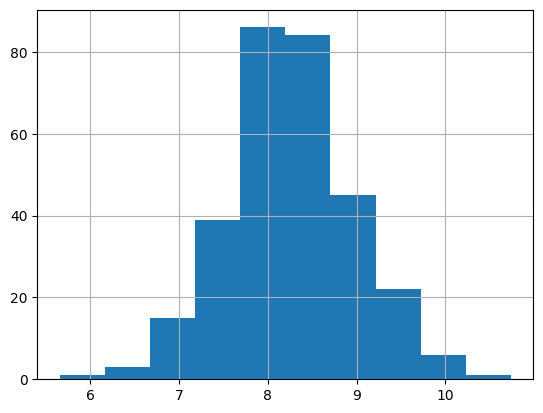

In [431]:
all_data['CHEK2'].hist()

In [434]:
all_data

,submitter_id,0,case_id,project,diagnoses,demographic,exposures,family_histories,follow_ups,AKT1,...,SPOP,SRC,STAT3,STK11,TOP1,TP53,TSC1,TSC2,U2AF1,XPO1
0,TCGA.04.1348,"[-0.013279920443892479, 0.05199901759624481, -...",f7752d6e-f9cd-4dc9-ab01-3ab87acb21e4,{'project_id': 'TCGA-OV'},"[{'figo_stage': 'Stage IIIB', 'synchronous_mal...","{'ethnicity': 'hispanic or latino', 'gender': ...","[{'alcohol_history': 'Not Reported', 'updated_...",NaN,NaN,12.5446,...,10.1504,9.1479,11.9670,10.7250,11.2246,12.2851,8.8353,11.6781,11.3683,12.1392
1,TCGA.04.1357,"[-0.021723929792642593, -0.02162325382232666, ...",feda41d8-ca56-425d-b149-4d5485328107,{'project_id': 'TCGA-OV'},"[{'figo_stage': 'Stage IIIB', 'synchronous_mal...",{'demographic_id': 'd7683fcc-e135-5577-a315-c4...,"[{'alcohol_history': 'Not Reported', 'updated_...",NaN,NaN,12.4337,...,10.4056,9.7897,12.8895,10.9486,11.1455,9.5909,9.0292,12.0694,10.6584,12.1957
2,TCGA.04.1362,"[-0.08096086978912354, 0.09924095869064331, 0....",1d192835-524e-429d-bf74-3c4727acb446,{'project_id': 'TCGA-OV'},"[{'figo_stage': 'Stage IIC', 'synchronous_mali...","{'ethnicity': 'not reported', 'gender': 'femal...","[{'alcohol_history': 'Not Reported', 'updated_...",NaN,NaN,11.7124,...,10.6425,11.0256,12.8345,10.5411,10.7250,8.8845,10.3351,11.2904,10.5580,12.3966
3,TCGA.04.1364,"[-0.06450150907039642, 0.015469476580619812, -...",80f85c54-e12f-4afa-8fa5-5f3e083b6f95,{'project_id': 'TCGA-OV'},"[{'figo_stage': 'Stage IIIC', 'synchronous_mal...","{'ethnicity': 'not hispanic or latino', 'gende...","[{'alcohol_history': 'Not Reported', 'updated_...",NaN,NaN,11.8507,...,10.0180,11.3400,11.7577,8.8738,12.3631,11.7589,9.1355,11.2187,10.6640,12.0109
4,TCGA.04.1365,"[-0.024995282292366028, -0.07693047821521759, ...",0484a929-7a7f-4926-8d25-470ddab082ec,{'project_id': 'TCGA-OV'},"[{'figo_stage': 'Stage IIIB', 'synchronous_mal...",{'demographic_id': 'ad52a183-6a6a-50ad-8f74-a1...,"[{'alcohol_history': 'Not Reported', 'updated_...",NaN,NaN,12.8338,...,10.7244,10.5127,12.0994,10.0001,11.7241,11.7777,9.5075,11.6229,10.1877,12.3303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,TCGA.61.2111,"[0.008367035537958145, -0.008517218753695488, ...",91a17d40-c8cb-4cce-b306-966382a8fe4a,{'project_id': 'TCGA-OV'},"[{'figo_stage': 'Stage IV', 'synchronous_malig...",{'demographic_id': '207b7d58-3bbf-5097-98dd-b5...,"[{'alcohol_history': 'Not Reported', 'updated_...",NaN,NaN,11.8819,...,10.9230,10.9552,12.0259,9.6223,11.5467,11.2646,9.0917,11.9295,10.8408,12.1709
298,TCGA.61.2113,"[0.06433556228876114, 0.042108066380023956, -0...",71faa2c1-0d5b-4dcc-bdf9-f2405f29907c,{'project_id': 'TCGA-OV'},"[{'figo_stage': 'Stage IIC', 'synchronous_mali...","{'ethnicity': 'not hispanic or latino', 'gende...","[{'alcohol_history': 'Not Reported', 'updated_...",NaN,NaN,12.0080,...,10.1581,11.0098,12.6257,9.7184,11.4829,11.7458,9.9613,11.1643,10.6754,12.4288
299,TCGA.OY.A56P,"[-0.018870884552598, -0.020048385486006737, 0....",260723bf-9620-450d-bf31-f3a45543f9db,{'project_id': 'TCGA-OV'},"[{'figo_stage': 'Stage IIIB', 'synchronous_mal...",{'demographic_id': '24bd713d-fde2-55f4-b722-af...,"[{'alcohol_history': 'Not Reported', 'updated_...",NaN,NaN,10.6654,...,9.9412,10.8234,12.5128,8.8892,11.3997,11.9811,9.8355,12.4506,10.6330,13.2112
300,TCGA.OY.A56Q,"[0.005540989339351654, -0.005743049085140228, ...",c7cf6755-8856-435b-a443-174b22a25b07,{'project_id': 'TCGA-OV'},"[{'figo_stage': 'Stage IIA', 'synchronous_mali...",{'demographic_id': 'd29528b8-bba5-5033-8fed-7d...,"[{'alcohol_history': 'Not Reported', 'updated_...",NaN,NaN,11.7956,...,9.8298,10.4756,11.6663,9.6889,11.4853,8.9084,10.0023,13.2219,10.8520,13.7147


In [490]:
X = np.random.random(
    (302, 1024))  #pd.DataFrame(np.stack(all_data[0].values)).fillna(0).values
y = all_data[target_labels].values.astype(float)


In [491]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [492]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [493]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, accuracy_score, f1_score, classification_report, r2_score
from sklearn.model_selection import KFold

In [494]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)

In [495]:
scaler = MinMaxScaler()
X_scaled = pca.fit_transform(X)

In [496]:
X.shape

(302, 1024)

In [497]:
from lightgbm import LGBMRegressor

In [507]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.svm import SVR

correls = []
folds = KFold(5, random_state=10, shuffle=True)

for train_idx, test_idx in folds.split(X, y):

    X_train, X_test, y_train, y_test = X[train_idx], X[test_idx], y[
        train_idx], y[test_idx]
    # Use Random Forest Regressor
    model = RandomForestRegressor(n_estimators=50, n_jobs=-1)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    print(mean_squared_error(y_test.flatten(), y_pred.flatten()))
    # correls.append(np.corrcoef(y_test, y_pred)[0, 1])

    # plt.scatter(y_test.flatten(), y_pred.flatten(), s=0.5)

1.2195476035685604
1.1752554866712763
1.2394659883782009
1.1458405337139452
1.1133046670261275


In [ ]:
y_pred

array([[12.0596386, 11.9691798,  7.5909096, ..., 11.4918464, 10.4891106,
        12.1869046],
       [11.9245852, 12.0099232,  7.7125098, ..., 11.565912 , 10.5715422,
        12.222278 ],
       [11.9631018, 12.002791 ,  7.6989518, ..., 11.6366924, 10.4793284,
        12.2336406],
       ...,
       [12.054447 , 11.9949436,  7.471927 , ..., 11.695854 , 10.5305246,
        12.2518656],
       [12.0612584, 12.0275368,  7.5552842, ..., 11.5830476, 10.529132 ,
        12.1827696],
       [11.9279248, 12.0059256,  7.5372864, ..., 11.5172584, 10.579671 ,
        12.2236634]])

In [508]:
correls = []
for i in range(len(target_labels)):
    correls.append(np.corrcoef(y_test[:, i], y_pred[:, i])[0, 1])

In [509]:
correls

[np.float64(-0.04448628647330125),
 np.float64(0.043290526054770295),
 np.float64(-0.06964004375728196),
 np.float64(0.01201683476438766),
 np.float64(-0.14983130839725373),
 np.float64(-0.15928629870655636),
 np.float64(0.07247631191158252),
 np.float64(0.22199466856414266),
 np.float64(0.21375224367750706),
 np.float64(0.0650984171550967),
 np.float64(0.061018094911479366),
 np.float64(-0.13614292563542812),
 np.float64(0.056199501576010884),
 np.float64(-0.13175238998785493),
 np.float64(0.14152820953559822),
 np.float64(0.013785413521626452),
 np.float64(-0.13778370496497513),
 np.float64(-0.02877633765017559),
 np.float64(0.11906820610746792),
 np.float64(-0.15768486575329388),
 np.float64(-0.11790234828200843),
 np.float64(-0.06364082354939209),
 np.float64(0.17536972801218842),
 np.float64(0.15429599061579893),
 np.float64(-0.23175010255844358),
 np.float64(-0.3293086798294053),
 np.float64(0.18517017430839278),
 np.float64(-0.0936033685259006),
 np.float64(-0.024179083593071055

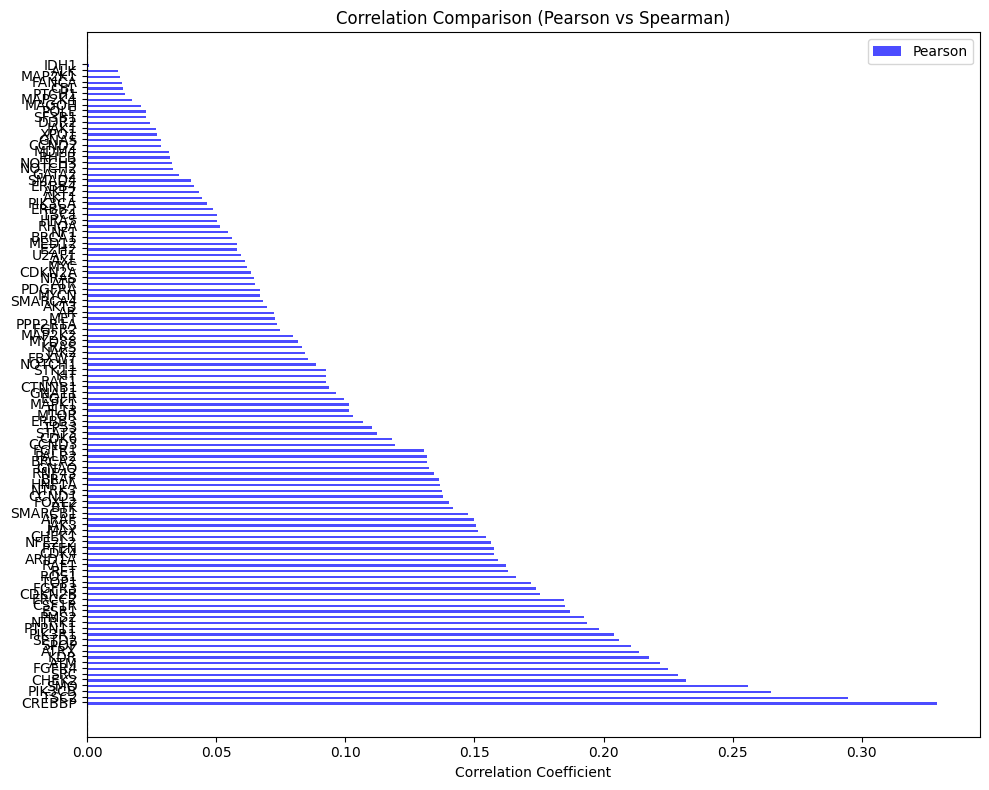

In [510]:
import matplotlib.pyplot as plt
import numpy as np

# Data extracted from the plot (example data, replace with actual values)
sort_idx = np.argsort(np.abs(correls))[::-1]
genes = np.array(target_labels)[sort_idx[:112]]

# Plotting
y_pos = np.arange(len(genes))

plt.figure(figsize=(10, 8))
plt.barh(y_pos - 0.2,
         np.abs(correls)[sort_idx[:112]],
         height=0.4,
         label='Pearson',
         color='blue',
         alpha=0.7)
# plt.barh(y_pos + 0.2, spearman, height=0.4, label='Spearman', color='orange', alpha=0.7)

plt.yticks(y_pos, genes)
plt.xlabel("Correlation Coefficient")
plt.title("Correlation Comparison (Pearson vs Spearman)")
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()
plt.tight_layout()

plt.show()


In [411]:
y_test.shape

(60, 112)

In [412]:
np.corrcoef(y_test.T, y_pred.T)

array([[ 1.        ,  0.03176109, -0.10763958, ..., -0.16658417,
         0.18144688,  0.03270986],
       [ 0.03176109,  1.        , -0.04347079, ...,  0.14714024,
        -0.02522744, -0.05377732],
       [-0.10763958, -0.04347079,  1.        , ...,  0.05621799,
        -0.17846159, -0.14036098],
       ...,
       [-0.16658417,  0.14714024,  0.05621799, ...,  1.        ,
        -0.01348575,  0.25585504],
       [ 0.18144688, -0.02522744, -0.17846159, ..., -0.01348575,
         1.        ,  0.24872344],
       [ 0.03270986, -0.05377732, -0.14036098, ...,  0.25585504,
         0.24872344,  1.        ]])

In [413]:
pca_vecs = pca.fit_transform(latent_vecs)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (1361, 2) + inhomogeneous part.

In [414]:
pca.explained_variance_ratio_.sum()

np.float32(0.7122752)

In [415]:
pca.get_covariance()

array([[ 6.17798812e-03,  1.34266905e-05,  1.62807095e-04, ...,
        -2.15873926e-04, -1.60683744e-04, -3.55258402e-05],
       [ 1.34266905e-05,  5.67721722e-03,  2.93018943e-04, ...,
         5.01905600e-05, -1.28433391e-05, -1.00011678e-04],
       [ 1.62807095e-04,  2.93018943e-04,  6.22929032e-03, ...,
         1.41071022e-05, -1.50008716e-04, -9.23492156e-05],
       ...,
       [-2.15873926e-04,  5.01905600e-05,  1.41071022e-05, ...,
         6.44499666e-03,  3.63097574e-05,  1.09043001e-04],
       [-1.60683744e-04, -1.28433391e-05, -1.50008716e-04, ...,
         3.63097574e-05,  5.95472553e-03,  9.66076319e-05],
       [-3.55258402e-05, -1.00011678e-04, -9.23492156e-05, ...,
         1.09043001e-04,  9.66076319e-05,  6.11222530e-03]])

In [416]:
np.corrcoef(pca_vecs[:, 0], [pca_vecs[:, 1]])

NameError: name 'pca_vecs' is not defined

In [417]:
plt.scatter(pca_vecs[:, 0], [pca_vecs[:, 1]])
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)

NameError: name 'pca_vecs' is not defined